In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import scipy.stats as stats
import pickle

In [2]:
#setting random seed to replicate results
DEFAULT_RANDOM_SEED = 2021

def seedBasic(seed=DEFAULT_RANDOM_SEED):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

import tensorflow as tf 
def seedTF(seed=DEFAULT_RANDOM_SEED):
    tf.random.set_seed(seed)

def seedEverything(seed=DEFAULT_RANDOM_SEED):
    seedBasic(seed)
    seedTF(seed)
    
seedEverything(2021)

In [4]:
data1 = pd.read_csv('/Users/akash/archive/Monday-WorkingHours.pcap_ISCX.csv')
data2 = pd.read_csv('/Users/akash/archive/Tuesday-WorkingHours.pcap_ISCX.csv')
data3 = pd.read_csv('/Users/akash/archive/Wednesday-workingHours.pcap_ISCX.csv')
data4 = pd.read_csv('/Users/akash/archive/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
data5 = pd.read_csv('/Users/akash/archive/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
data6 = pd.read_csv('/Users/akash/archive/Friday-WorkingHours-Morning.pcap_ISCX.csv')
data7 = pd.read_csv('/Users/akash/archive/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
data8 = pd.read_csv('/Users/akash/archive/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [5]:
data_list = [data1, data2, data3, data4, data5, data6, data7, data8]
df = pd.concat(data_list)

In [6]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [8]:
#Remove prefix spaces
df.columns = df.columns.str.lstrip()

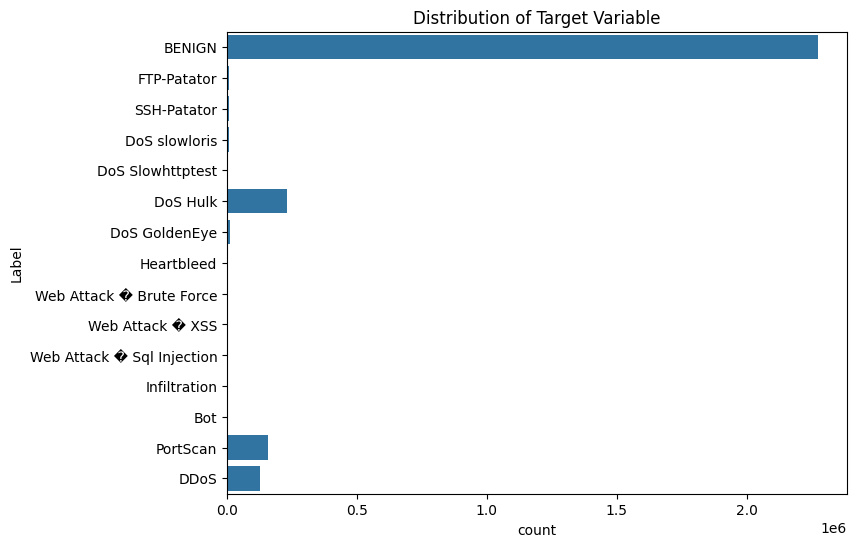

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df['Label'],orient='h')
plt.title('Distribution of Target Variable')
plt.show()

In [13]:
analysis_cols = []
discrete_cols = []
for col in df.columns[:]:
    if df[col].dtype != "object":
        analysis_cols.append({"Col_name" : col, "Min_Val" : df[col].min(), "Max_Val": df[col].max(), "Data_type" : df[col].dtype, "Unique values": len(pd.unique(df[col]))})
    else:
        discrete_cols.append({"Col_name" : col, "Unique values": len(pd.unique(df[col])), "All_unique": pd.unique(df[col])})

<h2>Numerical columns analysis</h2>

In [14]:
analysis_df = pd.DataFrame(analysis_cols)
print(analysis_df.to_string())

                       Col_name       Min_Val       Max_Val Data_type  Unique values
0              Destination Port  0.000000e+00  6.553500e+04     int64          53805
1                 Flow Duration -1.300000e+01  1.200000e+08     int64        1050899
2             Total Fwd Packets  1.000000e+00  2.197590e+05     int64           1432
3        Total Backward Packets  0.000000e+00  2.919220e+05     int64           1747
4   Total Length of Fwd Packets  0.000000e+00  1.290000e+07     int64          17928
5   Total Length of Bwd Packets  0.000000e+00  6.554530e+08     int64          64698
6         Fwd Packet Length Max  0.000000e+00  2.482000e+04     int64           5279
7         Fwd Packet Length Min  0.000000e+00  2.325000e+03     int64            384
8        Fwd Packet Length Mean  0.000000e+00  5.940857e+03   float64          99716
9         Fwd Packet Length Std  0.000000e+00  7.125597e+03   float64         253909
10        Bwd Packet Length Max  0.000000e+00  1.953000e+04     i

<h2>Discrete column analysis</h2>

In [15]:
discrete_df = pd.DataFrame(discrete_cols)
print(discrete_df.to_string())

  Col_name  Unique values                                                                                                                                                                                                           All_unique
0    Label             15  [BENIGN, FTP-Patator, SSH-Patator, DoS slowloris, DoS Slowhttptest, DoS Hulk, DoS GoldenEye, Heartbleed, Web Attack � Brute Force, Web Attack � XSS, Web Attack � Sql Injection, Infiltration, Bot, PortScan, DDoS]


<h2>Missing Values </h2>

In [10]:
df.isna().sum()[df.isna().sum() > 0]

Flow Bytes/s    1358
dtype: int64

<h2>Check for duplicates</h2>

In [18]:
duplicate = df[df.duplicated()]
duplicate

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2,49188,1,2,0,12,0,6,6,6.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,49486,1,2,0,12,0,6,6,6.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,49486,1,2,0,12,0,6,6,6.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
46,389,1,2,0,7,0,7,0,3.5,4.949747,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225687,137,4,2,0,124,0,62,62,62.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225696,53,184,2,2,84,310,42,42,42.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225698,53,168,2,2,72,194,36,36,36.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225706,53,176,2,2,142,242,71,71,71.0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


<h2>Removing duplicates, Removing missing values </h2>

In [7]:
df.replace([np.inf, -np.inf], np.nan, inplace=True) #Removing infinite values

In [8]:
df.drop_duplicates(keep=False,inplace=True) #remove duplicate

In [9]:
df.dropna(inplace=True) # remove rows containing missing values

<h2>Creating subset of original dataframe for creating synthetic data</h2>

In [10]:
# Define the percentage of the original dataset you want in the subset
subset_percentage = 0.10

# Define a minimum sample size for each class
min_sample_size = 1000

total_rows = len(df)
subset_size = int(total_rows * subset_percentage)

In [11]:
from sklearn.utils import resample

subset_df = pd.DataFrame()

for class_name in df['Label'].unique():
    class_data = df[df['Label'] == class_name]
    class_proportion = len(class_data) / total_rows
    class_sample_size = max(int(subset_size * class_proportion), min_sample_size)
    
    class_sample_size = min(class_sample_size, len(class_data))
    
    # Sample data for the current class
    sampled_data = resample(class_data, n_samples=class_sample_size, random_state=42, replace=False)
    subset_df = pd.concat([subset_df, sampled_data])

In [12]:
subset_df = subset_df.sample(frac=1, random_state=DEFAULT_RANDOM_SEED).reset_index(drop=True)

In [13]:
float_columns = df.select_dtypes(include=['float64']).columns.tolist()
int_columns = df.select_dtypes(include=['int64']).columns.tolist()
object_columns = df.select_dtypes(include=['object']).columns.tolist()

In [14]:
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframes(
    data={
        'ids': subset_df,
    })

In [15]:
metadata.update_columns(
    column_names=int_columns,
    sdtype='numerical',
    table_name='ids',
    computer_representation='Int64',
)

metadata.update_columns(
    column_names=float_columns,
    sdtype='numerical',
    table_name='ids',
    computer_representation='Float',
)

metadata.update_columns(
    column_names=object_columns,
    sdtype='categorical',
    table_name='ids',
)

In [23]:
# from sdv.single_table import CTGANSynthesizer

# synthesizer = CTGANSynthesizer(metadata=metadata,cuda=True)
# synthesizer.fit(subset_df)

# synthetic_data = synthesizer.sample(num_rows=10000)

C:\Users\akash\anaconda3\envs\proj_env\lib\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [24]:
# synthetic_data.to_csv('data.csv')

In [25]:
# synthesizer.save(
#     filepath='my_synthesizer.pkl'
# )

In [27]:
# synthetic_data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,50,59355,12,4,41,0,740,0,4.042365,0.790155,...,-282,0.000000,0.0,0,513,6.674454e+04,0.000000,0,28865,SSH-Patator
1,52,30580407,7,5,452,6605,392,0,123.025224,171.642192,...,-702,1201.570230,0.0,0,1652,1.062313e+07,4498.683927,20514533,5997158,DoS GoldenEye
2,112,102992405,2,2,35,0,18,6,6.493130,0.000000,...,-745,659.316284,0.0,0,1311,1.012151e+08,6542.295628,98763141,100435419,DoS slowloris
3,453,60682560,1,13,53,806,32,1,37.333180,13.381788,...,-409,101479.907127,0.0,23399,44,6.932652e+07,2442.130102,58719465,75697953,BENIGN
4,29,6332515,13,11,92,1693,29,1,7.817241,7.635458,...,-451,0.000000,0.0,1364,207,7.143109e+04,0.000000,0,39215,FTP-Patator


In [16]:
synthetic_data = pd.read_csv('data.csv')

In [17]:
synthetic_data.drop('Unnamed: 0',axis=1,inplace=True)

In [18]:
synthetic_data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,50,59355,12,4,41,0,740,0,4.042365,0.790155,...,-282,0.000000,0.0,0,513,6.674454e+04,0.000000,0,28865,SSH-Patator
1,52,30580407,7,5,452,6605,392,0,123.025224,171.642192,...,-702,1201.570230,0.0,0,1652,1.062313e+07,4498.683927,20514533,5997158,DoS GoldenEye
2,112,102992405,2,2,35,0,18,6,6.493130,0.000000,...,-745,659.316284,0.0,0,1311,1.012151e+08,6542.295628,98763141,100435419,DoS slowloris
3,453,60682560,1,13,53,806,32,1,37.333180,13.381788,...,-409,101479.907127,0.0,23399,44,6.932652e+07,2442.130102,58719465,75697953,BENIGN
4,29,6332515,13,11,92,1693,29,1,7.817241,7.635458,...,-451,0.000000,0.0,1364,207,7.143109e+04,0.000000,0,39215,FTP-Patator


<h2>Evaluating synthetic dataset </h2>

In [19]:
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality
from sdv.evaluation.single_table import get_column_plot

# 1. perform basic validity checks
diagnostic = run_diagnostic(subset_df, synthetic_data, metadata)

# 2. measure the statistical similarity
quality_report = evaluate_quality(subset_df, synthetic_data, metadata)


Generating report ...

(1/2) Evaluating Data Validity: |█████████████████████████████████████████████████████| 79/79 [00:01<00:00, 58.34it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |█████████████████████████████████████████████████████| 1/1 [00:00<00:00, 210.33it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Column Shapes: |█████████████████████████████████████████████████████| 79/79 [00:03<00:00, 23.16it/s]|
Column Shapes Score: 71.94%

(2/2) Evaluating Column Pair Trends: |████████████████████████████████████████████| 3081/3081 [01:20<00:00, 38.40it/s]|
Column Pair Trends Score: 91.66%

Overall Score (Average): 81.8%



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed